## k-Means Clustering on Diabetes Dataset

### Initial Set-up

The following libraries are to be imported and set-up. They include NumPy and Pandas for basic data exploration and extraction of descriptive statistics, seaborn for visualization, preprocessing tools for data normalization, and the k-means library and silhouette score for model evaluation.

In [1]:
#getting and working with data
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
import numpy as np
from sklearn.metrics.cluster import silhouette_score

#visualizing results
%matplotlib inline
import seaborn as sns

### Analyzing the Diabetes Dataset

The Diabetes dataset is imported from **sklearn**. It includes the following attributes to predict diabetes progression:
*     Age
*     Sex
*     Body mass index
*     Average blood pressure
*     S1
*     S2
*     S3
*     S4
*     S5
*     S6

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)

In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Check attributes present in the dataset

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes_df = diabetes.data
diabetes_df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

Plot pairplot of all the dimensions in the data:

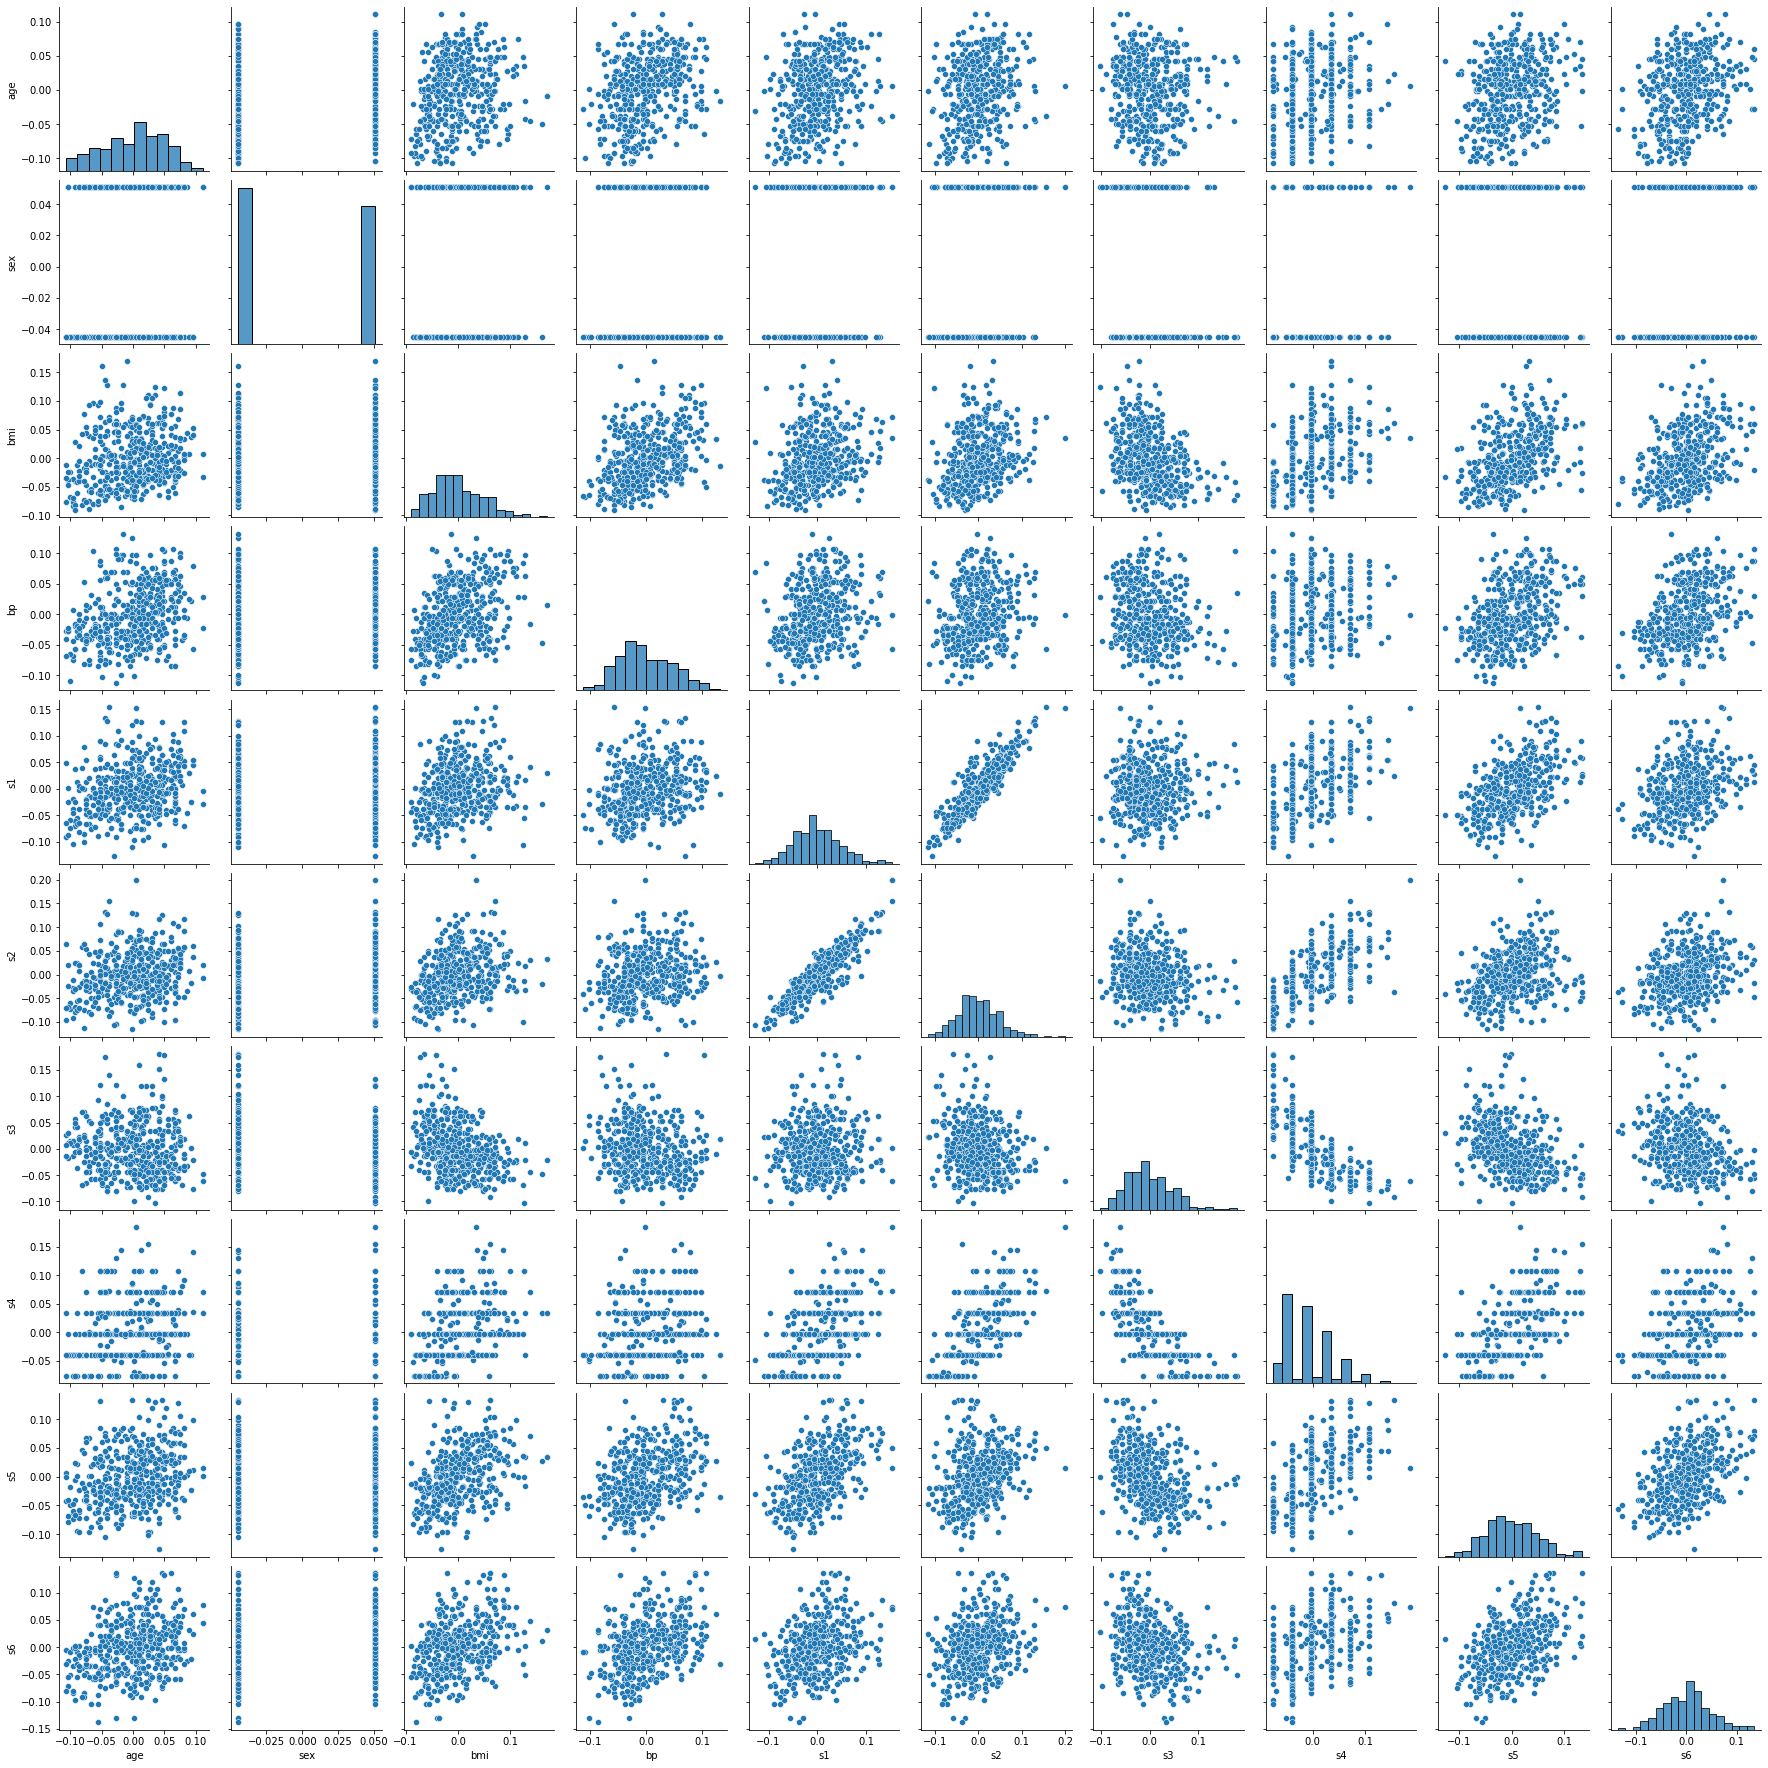

In [6]:
sns.pairplot(diabetes_df)

## Test Data with 3 clusters

In [7]:
kmeans = KMeans(n_clusters=3,random_state=1234)
kmeans.fit(diabetes_df)

KMeans(n_clusters=3, random_state=1234)

In [8]:
kmeans.labels_   # Property of kmeans

array([1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1,
       1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2,
       1, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1,
       2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1,
       2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1,

age         float64
sex         float64
bmi         float64
bp          float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
kmeans_3     object
dtype: object


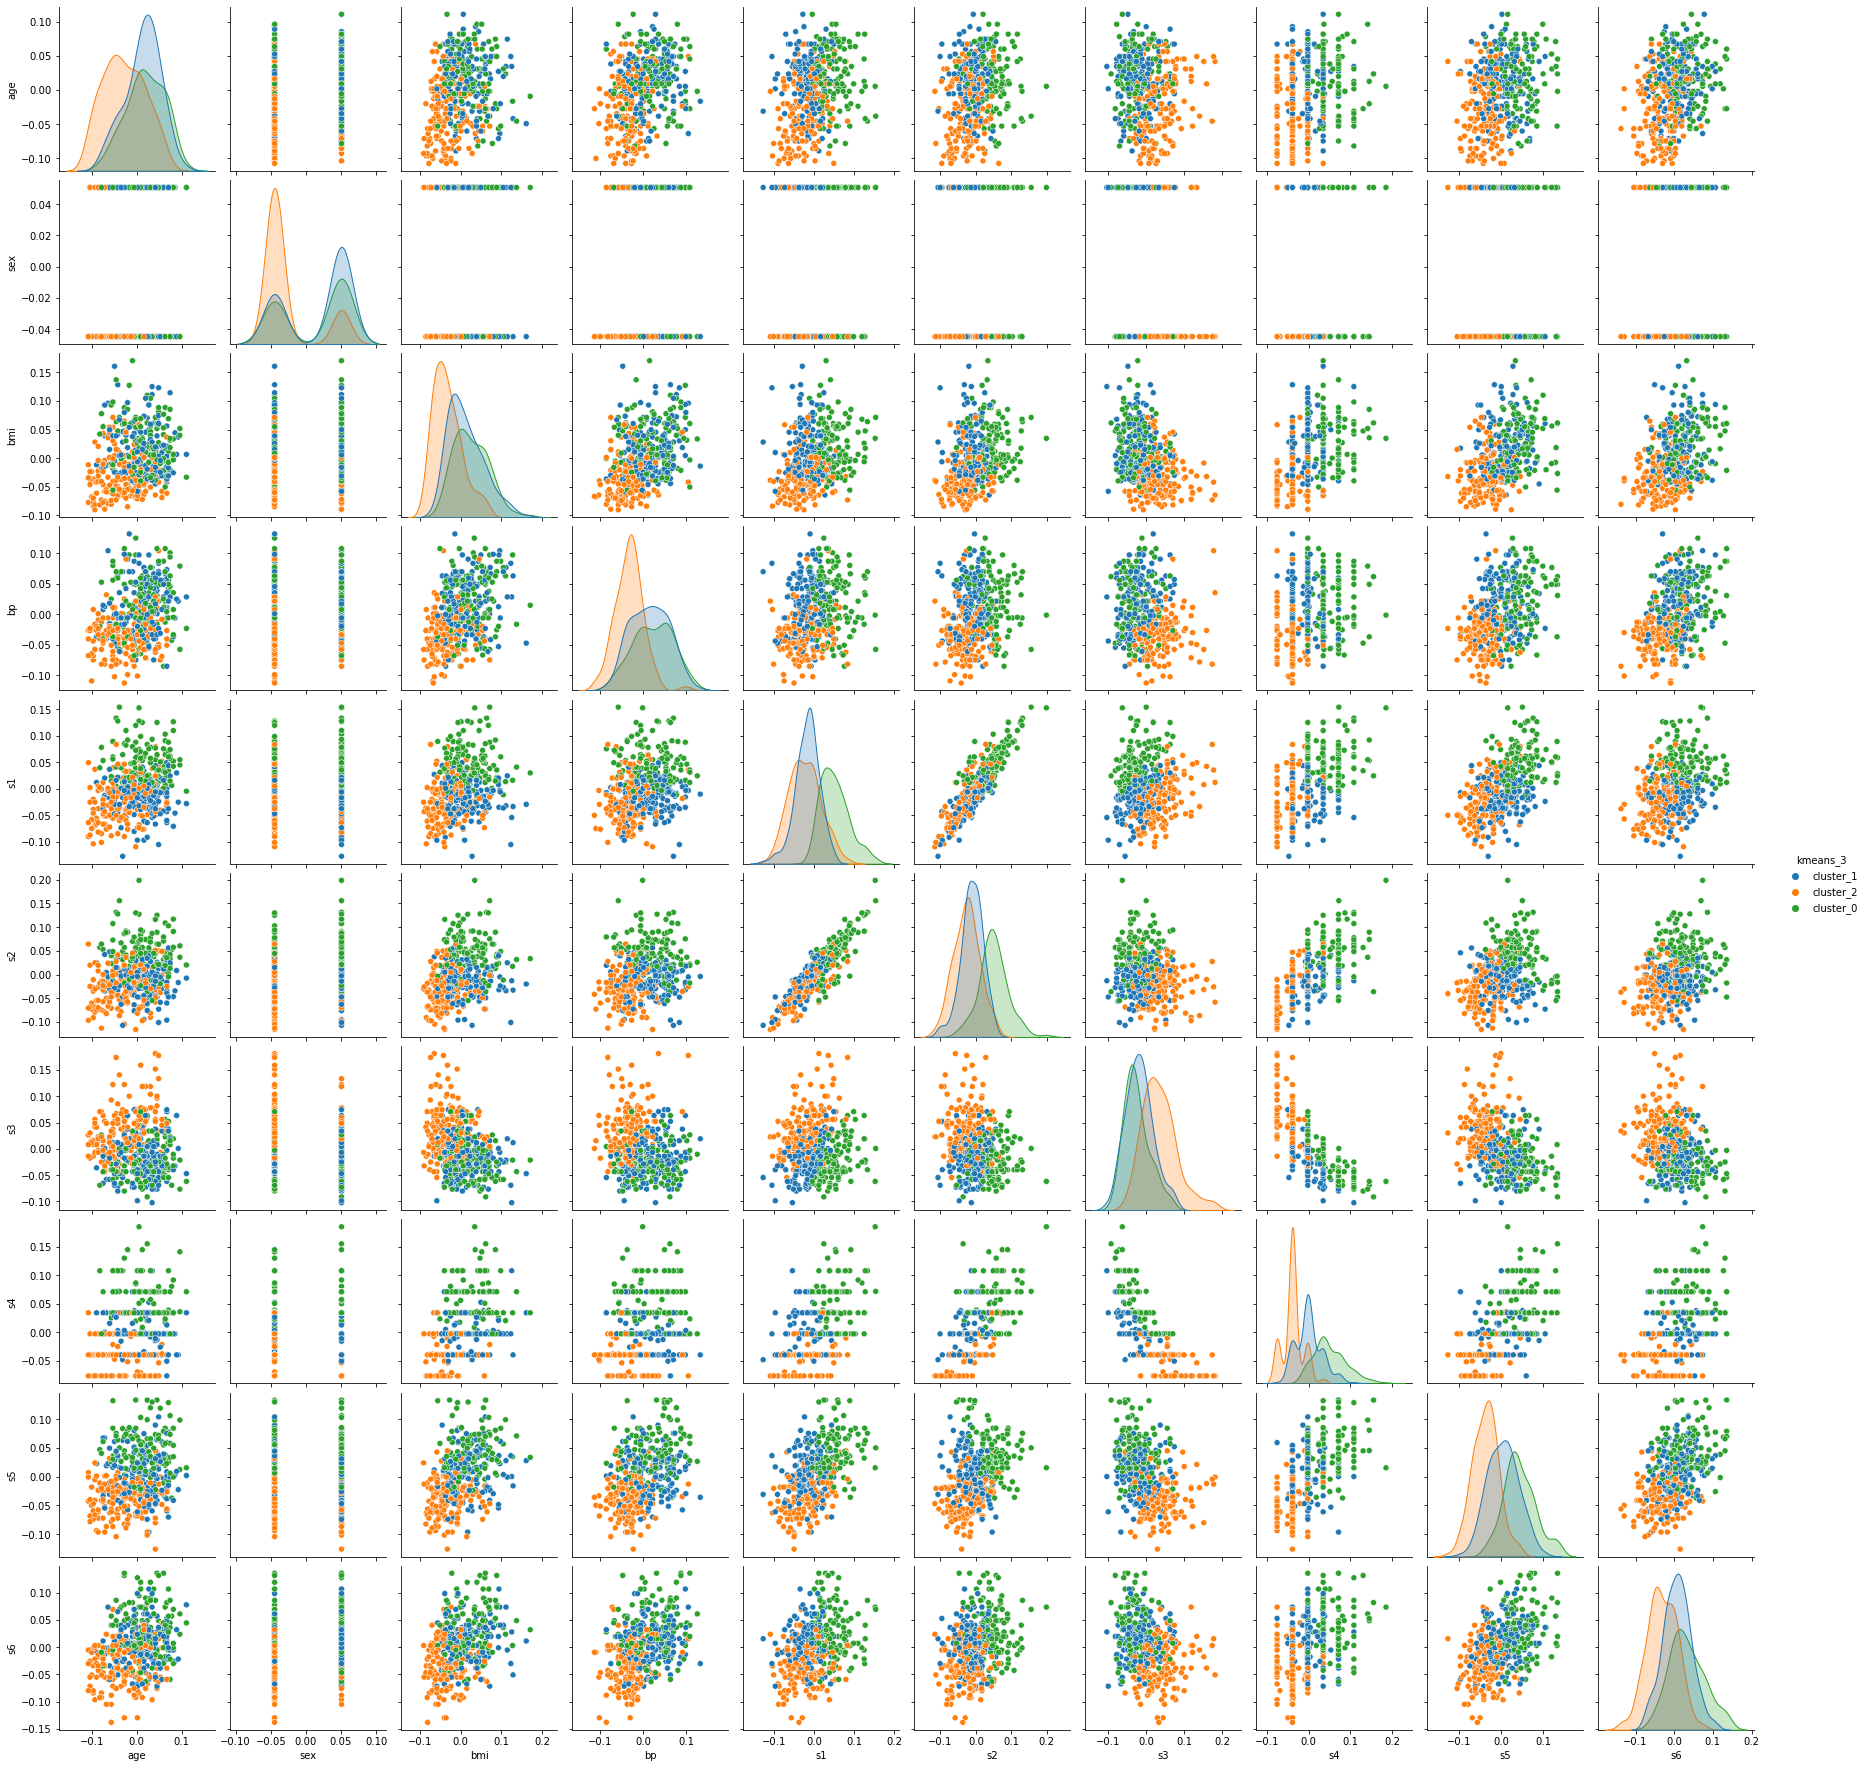

In [9]:
diabetes_df["kmeans_3"] = ["cluster_"+str(label) for label in kmeans.labels_]
print(diabetes_df.dtypes)
sns.pairplot(diabetes_df, hue="kmeans_3")

In [10]:
print("Cluster centers found by k-means:\n",kmeans.cluster_centers_)

Cluster centers found by k-means:
 [[ 0.01918085  0.01301265  0.02571988  0.02282562  0.0514829   0.04912323
  -0.02425039  0.05075069  0.043457    0.03269384]
 [ 0.01364941  0.01829516  0.01298739  0.01534709 -0.01731304 -0.01166283
  -0.01754678 -0.00010617  0.00416438  0.00686134]
 [-0.02782552 -0.02757787 -0.0321932  -0.03225014 -0.02273485 -0.02636962
   0.03545893 -0.03874397 -0.03727352 -0.03163213]]


In [11]:
diabetes_3_cluster_centers = diabetes_df.groupby("kmeans_3").mean()
print("Means of each column :\n",diabetes_3_cluster_centers.values)

Means of each column :
 [[ 0.01918085  0.01301265  0.02571988  0.02282562  0.0514829   0.04912323
  -0.02425039  0.05075069  0.043457    0.03269384]
 [ 0.01364941  0.01829516  0.01298739  0.01534709 -0.01731304 -0.01166283
  -0.01754678 -0.00010617  0.00416438  0.00686134]
 [-0.02782552 -0.02757787 -0.0321932  -0.03225014 -0.02273485 -0.02636962
   0.03545893 -0.03874397 -0.03727352 -0.03163213]]


In [12]:
diabetes_3_cluster_centers

age       sex       bmi        bp        s1        s2  \
kmeans_3                                                                
cluster_0  0.019181  0.013013  0.025720  0.022826  0.051483  0.049123   
cluster_1  0.013649  0.018295  0.012987  0.015347 -0.017313 -0.011663   
cluster_2 -0.027826 -0.027578 -0.032193 -0.032250 -0.022735 -0.026370   

                 s3        s4        s5        s6  
kmeans_3                                           
cluster_0 -0.024250  0.050751  0.043457  0.032694  
cluster_1 -0.017547 -0.000106  0.004164  0.006861  
cluster_2  0.035459 -0.038744 -0.037274 -0.031632

Let's plot the cluster centers on one of the plots we found above:

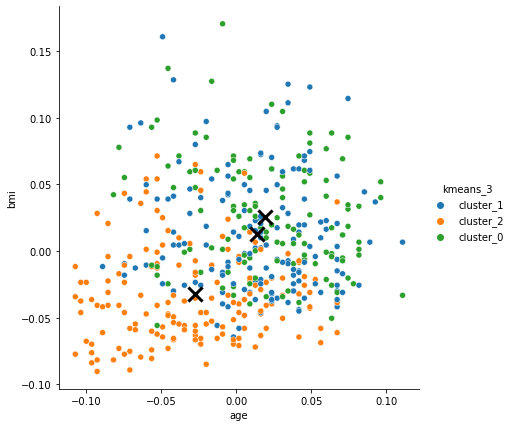

In [13]:
colors = np.array(['red', 'green', 'blue'])

sns.pairplot(diabetes_df,x_vars="age",y_vars="bmi",hue="kmeans_3",height=6)
sns.mpl.pyplot.scatter(diabetes_3_cluster_centers.age, diabetes_3_cluster_centers.bmi, linewidths=3, marker='x', s=200, c='black')


In [14]:
diabetes_3_cluster_centers.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

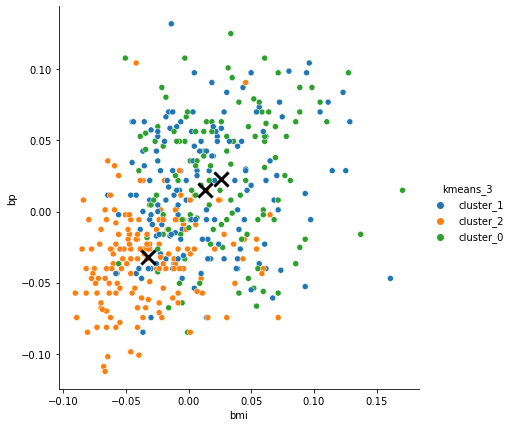

In [15]:
colors = np.array(['red', 'green', 'blue'])

sns.pairplot(diabetes_df,x_vars="bmi",y_vars="bp",hue="kmeans_3",height=6)
sns.mpl.pyplot.scatter(diabetes_3_cluster_centers.bmi, diabetes_3_cluster_centers.bp, linewidths=3, marker='x', s=200, c='black')


The center of the clusters 0 and 1 overlap to a large degree.

Perform Z-scoring on the data us to compare values across columns.

In [21]:
diabetes_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'kmeans_3'],
      dtype='object')

In [20]:
# center and scale the data
scaler = StandardScaler()
diabetes_no_labels = diabetes_df.drop(columns=['kmeans_3'])
diabetes_df_scaled = scaler.fit_transform(diabetes_no_labels)
diabetes_df_scaled = pd.DataFrame(diabetes_df_scaled,columns=diabetes_no_labels.columns)
print("Before scaling:\n", diabetes_df.describe())
print("\nAfter scaling:\n", np.round(diabetes_df.describe(),2))

Before scaling:
                 age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16  
std    4.761905e-02  4.761905e-02  4.

## Try with 2 Clusters and Scaling

In [27]:
diabetes_no_labels.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [28]:
# K-means on scaled data
km = KMeans(n_clusters=2,random_state=1234)
km.fit(diabetes_df_scaled)
diabetes_no_labels['kmeans_2_scaled'] = [ "cluster_" + str(label) for label in km.labels_ ]
print(km.cluster_centers_)
diabetes_no_labels.groupby('kmeans_2_scaled').mean()

[[ 0.35233026  0.31837384  0.49664446  0.4322204   0.50864861  0.54410834
  -0.52068776  0.70136299  0.63037035  0.51588114]
 [-0.3753799  -0.33920204 -0.52913521 -0.4604965  -0.54192468 -0.57970421
   0.55475145 -0.74724655 -0.67160953 -0.54963038]]


age       sex       bmi        bp        s1        s2  \
kmeans_2_scaled                                                               
cluster_0        0.016759  0.015143  0.023623  0.020559  0.024194  0.025881   
cluster_1       -0.017855 -0.016134 -0.025168 -0.021904 -0.025777 -0.027574   

                       s3        s4        s5        s6  
kmeans_2_scaled                                          
cluster_0       -0.024767  0.033360  0.029984  0.024538  
cluster_1        0.026387 -0.035543 -0.031945 -0.026143

In [29]:
diabetes_no_labels.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6 kmeans_2_scaled  
0 -0.002592  0.019908 -0.017646       cluster_0  
1 -0.039493 -0.068330 -0.092204       cluster_1  
2 -0.002592  0.002864 -0.025930       cluster_0  
3  0.034309  0.022692 -0.009362       cluster_0  
4 -0.002592 -0.031991 -0.046641       cluster_1

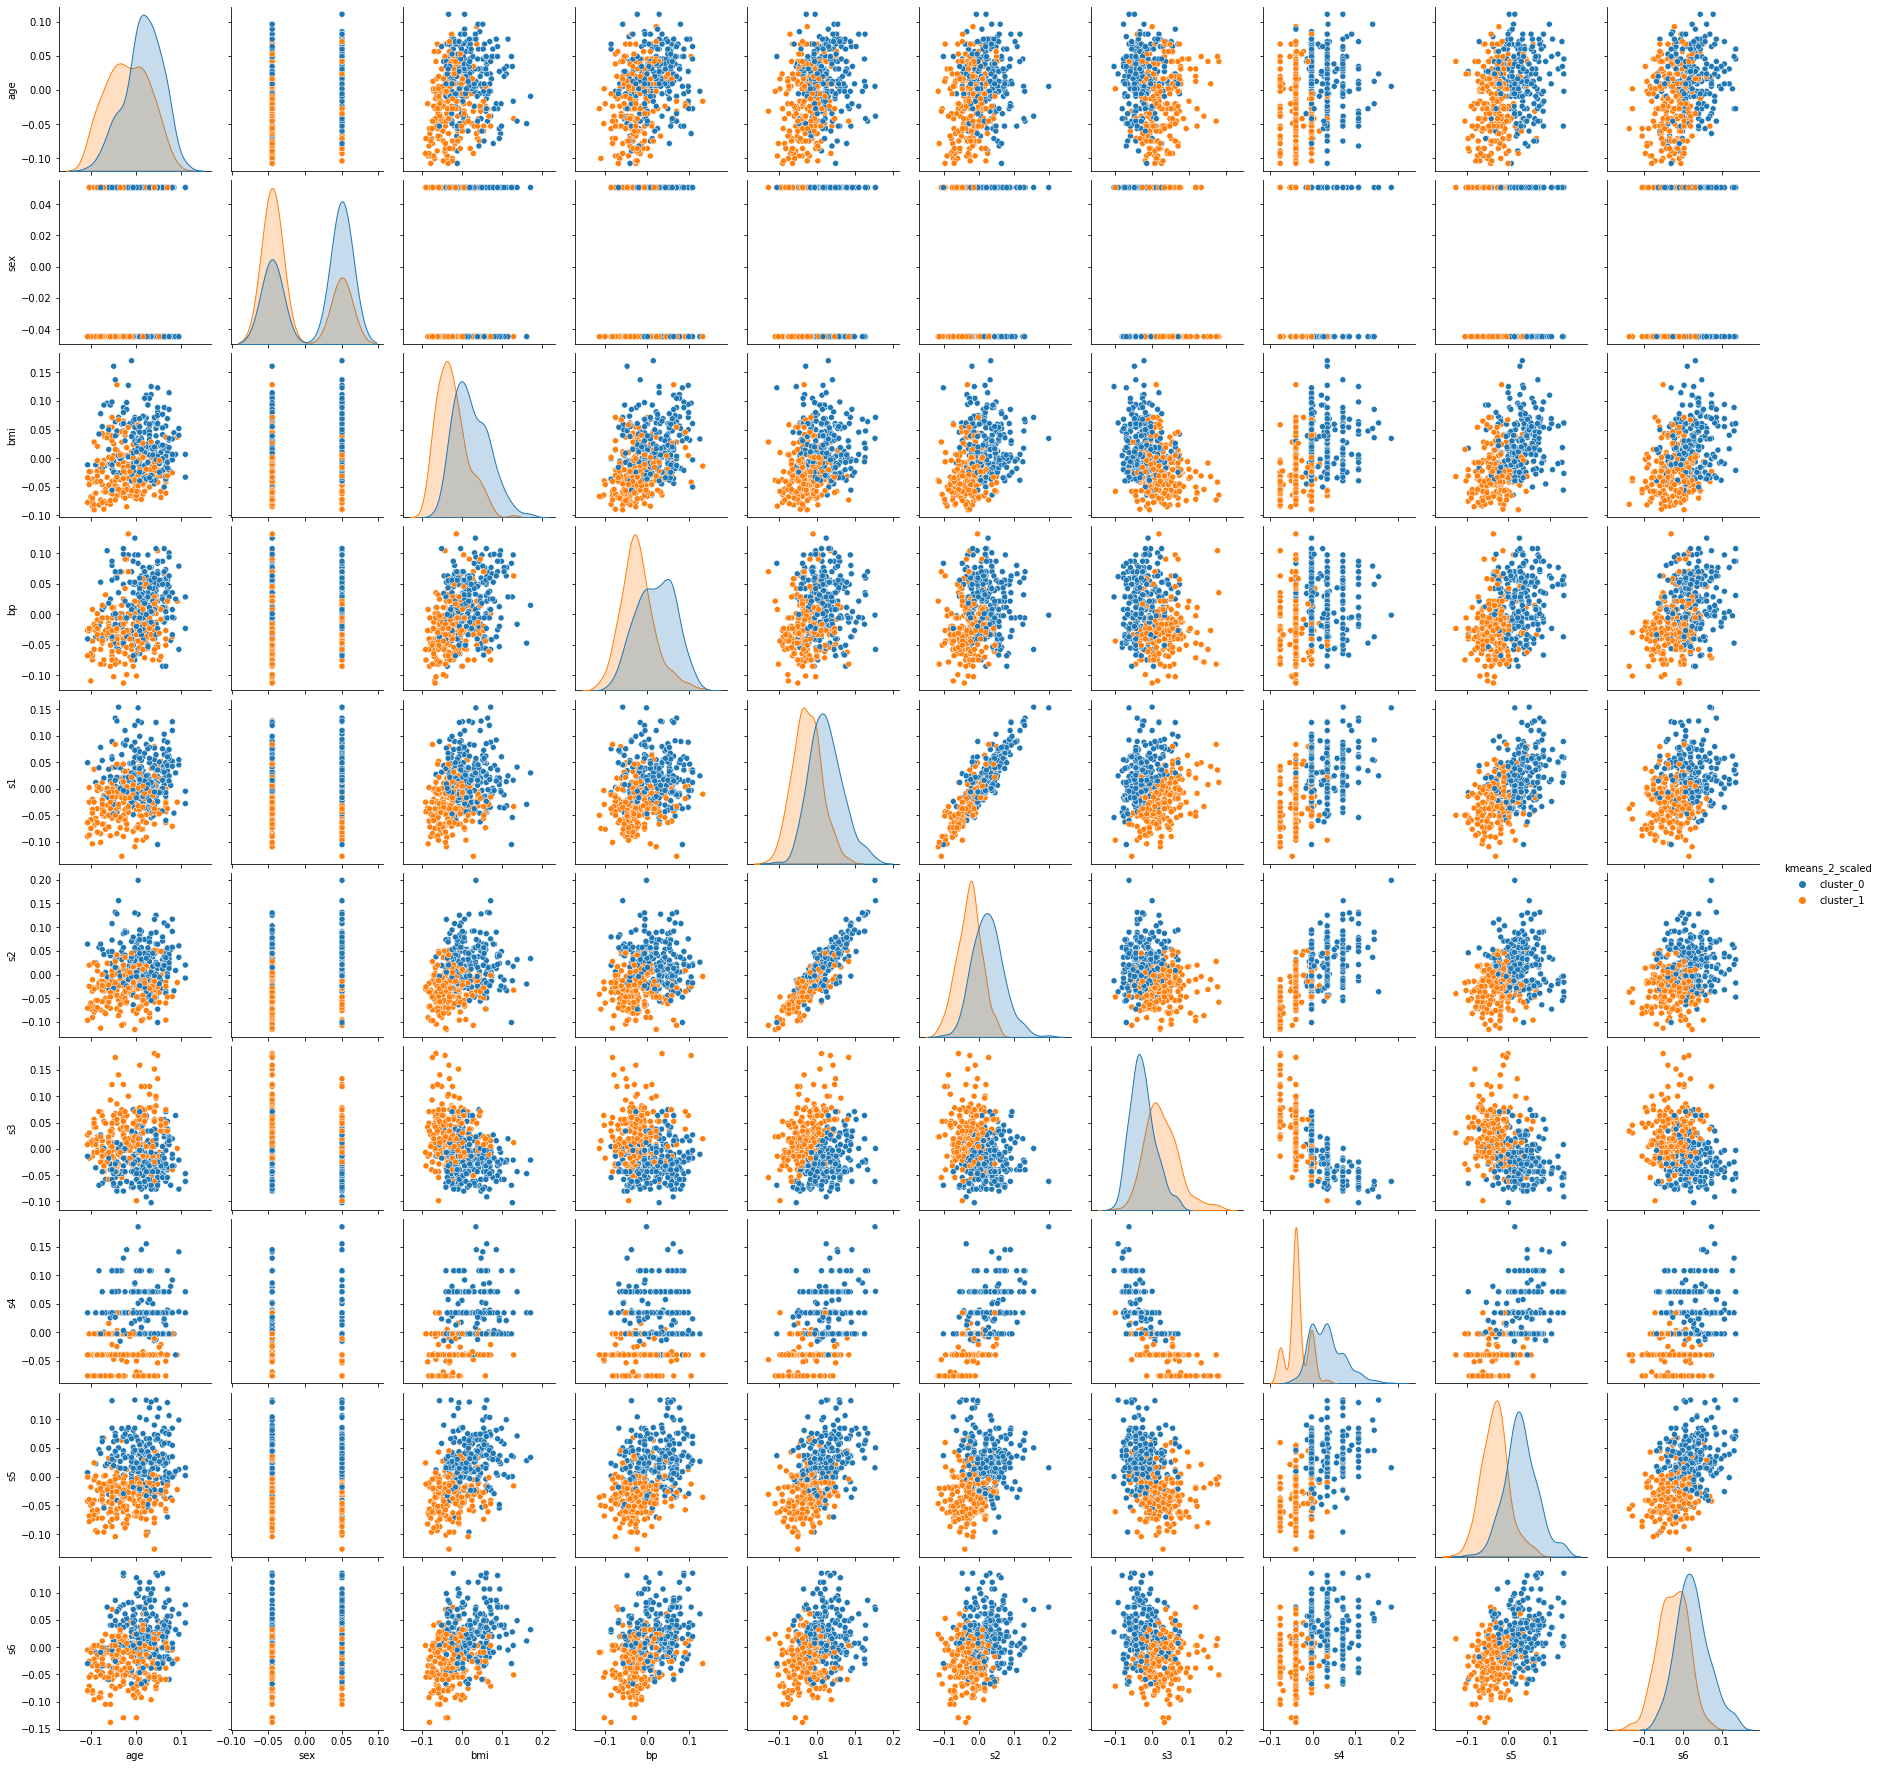

In [30]:
sns.pairplot(diabetes_no_labels,hue="kmeans_2_scaled")

See the difference in cluster labels after scaling has been performed? The clusters are much cleaner!

What happens if we increase the number of clusters?

In [31]:
print("Silhouette score when k=2:",silhouette_score(diabetes_df_scaled, km.labels_))

Silhouette score when k=2: 0.2369871703168185


Now let's calculate and plot the silhouette score for between 2 and 15 clusters:

Text(0, 0.5, 'Silhouette Coefficient')

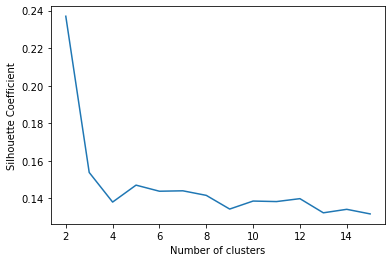

In [32]:
k_range = range(2,16)
scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(diabetes_df_scaled)
    scores.append(silhouette_score(diabetes_df_scaled, km_ss.labels_))

# plot the results
sns.mpl.pyplot.plot(k_range, scores)
sns.mpl.pyplot.xlabel('Number of clusters')
sns.mpl.pyplot.ylabel('Silhouette Coefficient')

### DBSCAN

The second clustering algorithm we are going to investigate is called **DBSCAN** and works a bit differently than K-means.[DBSCAN wiki](https://en.wikipedia.org/wiki/DBSCAN)

**DBSCAN** stands for **Density-based spatial clustering of applications with noise**.

Whereas K-means does not care about the density of data, **DBSCAN** does, under the assumption that **regions of high density in your data should be treated as clusters**.

Furthermore, **DBSCAN does not allow you to specify how many clusters you want.** Instead, you specify 2 parameters:
  1. **$\epsilon$ (epsilon)**: This is the maximum distance between two points to allow them to be neighbors
  2. **min_samples**: The number of neighbors a given point is allowed to have to be able to be part of a cluster

Any points that don't satisfy the criteria of being close enough to other points are labeled outliers and all fall into a single "cluster" (their cluster label by default is -1).

### Takeaways

**K-means**:
  * is a good off-the-shelf clustering algorithm when youre dealing with numerical data and have some idea of the number of clusters you are looking for in your dataset
  * requires feature scaling
  * requires specifiying the number of clusters
  * can only use the euclidean distance as a distance metric
  * is non-deterministic (will generate different cluster labelings depending on initial conditions)

**DBSCAN**:
  * is a good clustering algorithm when you are attempting to find dense and non-dense regions in your feature space but dont know the number of clusters you're looking for.
  * requires feature scaling
  * requires specifying a distance metric (euclidean is default)
  * requires specifying a minimum distance between points, $\epsilon$
  * requires specifying a minimum number of points to be called a "cluster" (min_samples), minimum is 2
  * is non-deterministic (when points are on the border between two clusters, can be assigned to either one, depending on order in which un-visited points are visited).   